**Housing price is a real-world problem that is important to many people, whether they are buying or selling a home, or simply interested in the housing market. Building a regression model to predict housing prices is a practical application of machine learning**

**Housing price is a commonly used dataset in machine learning, especially in the field of regression, where the goal is to predict a continuous numerical output. The importance of housing price in machine learning lies in its usefulness as a benchmark dataset for building and testing regression models.**

The data set used in this project is Boston House Prices, which is available on [Boston Housing data](http://lib.stat.cmu.edu/datasets/boston
)

The major aim of this project is to predict the house prices based on the features by using some of the most common Machine Learning Algoeithms such as the following: 

1. Linear Regression

2. Random Forest Regressor

First, all the libraries we are going to use are imported.



In [1]:
# Importing the libraries 

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the Boston Housing dataset

data = pd.read_csv('housing.csv')
data.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [4]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=columns)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Understanding the dataset**

Check the description

**This Dataset consist several features such as Number of Rooms, Crime Rate, and Tax and so on.**

**The target in this case “prices” is the last column in the dataset called 'medv'**



# Basic Analysis

Checking the shape of the data also checking for missing values


In [5]:
#Shape of dataset
print("Shape of Training dataset:", boston.shape)


Shape of Training dataset: (506, 14)


The target variable is the last column called 'MEDV'. Thus, lets rename it to 'PRICE'.

In [7]:
boston.rename(columns={'MEDV':'PRICE'}, inplace=True)


In [8]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


'MEDV'has been renamed as 'PRICE'.

#Summarizing the stats of the data


In [9]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#**Exploratory Data Analysis**

Exploratory Data Analysis is done to discover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

In [11]:
#The 2 main variable are 'lstat'- inDependent variable and 'price' dependent variable. So we'll segregate the data.
data_= boston.loc[:,['LSTAT','PRICE']]
data_.head(5)

,LSTAT,PRICE
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


# **Visualising Variables**

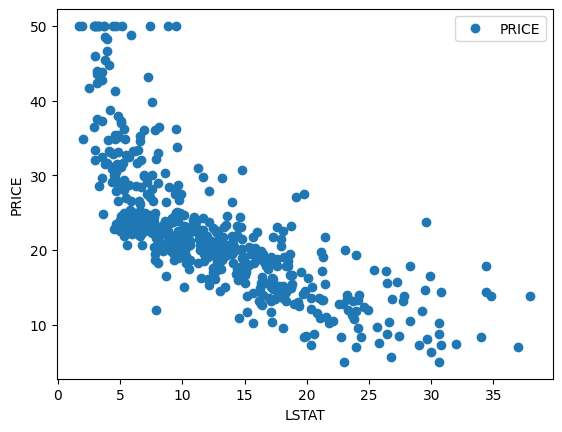

In [13]:
import matplotlib.pyplot as plt
boston.plot(x='LSTAT',y='PRICE', style='o')
plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.show()

It can be seen in the graph that there is an inverse relationship. i,e., as LSTAT increase PRICE decreasses, as the population percentage which is below the poverty line increases, the median value of the price of the houses decreases.

In [15]:
X = pd.DataFrame(boston['LSTAT'])
y = pd.DataFrame(boston['PRICE'])

In [16]:
X.size,y.size

(506, 506)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 1)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
print(regressor.intercept_)

[34.33497839]


In [21]:
print(regressor.coef_)

[[-0.92441715]]


Negative value means that when the independent value increases, the dependent value decreases. There is an inverse relationship between independent and dependent variable.

In [22]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [23]:
from sklearn import metrics
import numpy as np

In [24]:
print('Mean Absolute error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


Mean Absolute error:  5.078127727696937
Mean Squared error:  46.994820919547124
Root Mean Squared error:  6.855276866731724


The lower the value of root mean squared error, the better the model.

# **Multiple Linear Regression**

In [26]:
import pandas as pd
import numpy as np
boston = pd.read_csv('housing.csv')
boston.head(5)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [27]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=columns)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 5)

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [32]:
print('Mean Absolute error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error:  3.5576684756500447
Mean Squared error:  30.697037704088654
Root Mean Squared error:  5.540490745781339


The root mean squared error for first model is 6.85 and the root mean squared error for the 2nd model is 5.54. As we know, the lower the RMS error, the better the model, here, the 2nd model is better than the 1st model.